In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
train = pd.read_csv('../../Data/ADASYN/PCA_ADASYN.csv')
test = pd.read_csv('./EmbeddedData/test_PCA.csv')

In [4]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [5]:
# Splitting the dataset into the Training set and Test set  
#to use sklearn we need data in matrix not in data frame
# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
# from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
# sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Decision Tree Classification

In [7]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[78619  5421]
 [ 1781  9826]]
Accuracy Score is 0.9247
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     84040
           1       0.64      0.85      0.73     11607

    accuracy                           0.92     95647
   macro avg       0.81      0.89      0.84     95647
weighted avg       0.94      0.92      0.93     95647

AUC-ROC: 0.8910265569321343
LOGLOSS Value is 2.6007


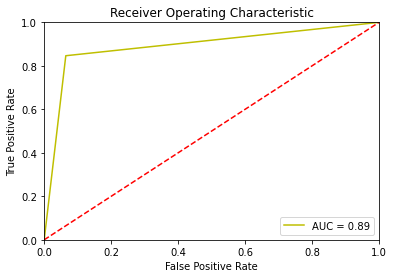

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classification

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[82636  1404]
 [ 2260  9347]]
Accuracy Score is 0.9617
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     84040
           1       0.87      0.81      0.84     11607

    accuracy                           0.96     95647
   macro avg       0.92      0.89      0.91     95647
weighted avg       0.96      0.96      0.96     95647

AUC-ROC: 0.8942917904707752
LOGLOSS Value is 1.3231


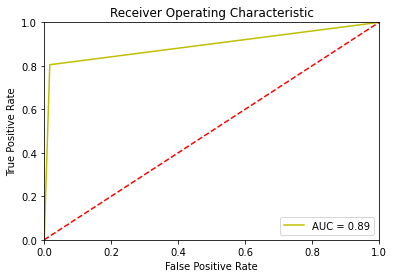

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost

In [13]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

In [14]:
# fit the model on the whole dataset
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[69079 14961]
 [  533 11074]]
Accuracy Score is 0.8380
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     84040
           1       0.43      0.95      0.59     11607

    accuracy                           0.84     95647
   macro avg       0.71      0.89      0.74     95647
weighted avg       0.92      0.84      0.86     95647

AUC-ROC: 0.8880285322619779
LOGLOSS Value is 5.5951


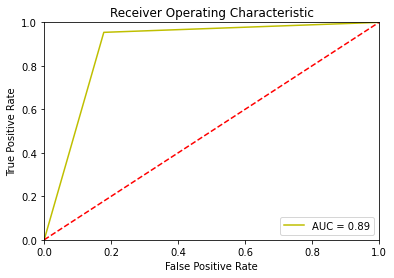

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LigthGBM

In [17]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [18]:
# fit the model on the whole dataset
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[74177  9863]
 [  398 11209]]
Accuracy Score is 0.8927
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.88      0.94     84040
           1       0.53      0.97      0.69     11607

    accuracy                           0.89     95647
   macro avg       0.76      0.92      0.81     95647
weighted avg       0.94      0.89      0.91     95647

AUC-ROC: 0.9241747833117987
LOGLOSS Value is 3.7054


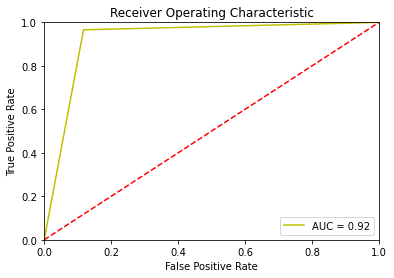

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Machine

In [21]:
# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [22]:
# fit the model on the whole dataset
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[70922 13118]
 [  423 11184]]
Accuracy Score is 0.8584
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     84040
           1       0.46      0.96      0.62     11607

    accuracy                           0.86     95647
   macro avg       0.73      0.90      0.77     95647
weighted avg       0.93      0.86      0.88     95647

AUC-ROC: 0.9037320687794179
LOGLOSS Value is 4.8899


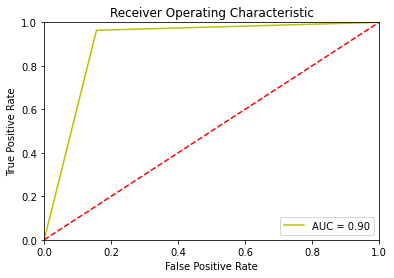

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()